# 热狗识别案例

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib

## 1 获取数据集

In [3]:
traindir ='hotdog/train'
testdir = 'hotdog/test'

In [4]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/225.)

In [5]:
# 获取训练数据集(读取文件夹中的图像并自动打标签)
train_data_gen = image_gen.flow_from_directory(traindir, batch_size=32, target_size=(224, 224), shuffle=True)

Found 85 images belonging to 2 classes.


In [6]:
# 获取测试数据集
test_data_gen = image_gen.flow_from_directory(testdir, batch_size=32, target_size=(224, 224), shuffle = True)

Found 17 images belonging to 2 classes.


In [7]:
# 从数据生成器(train_data_gen)中“取出一批数据”。这批数据的大小由之前设置的 batch_size 决定
image, label = next(train_data_gen)
# image (32, 224, 224, 3)

# categorical 独热编码
# label[0] = [1.0, 0.0]
# label[1] = [0.0, 1.0]

In [8]:
# categorical 独热编码
print(train_data_gen.class_indices)

{'hot_dog': 0, 'not_hot_dog': 1}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid r

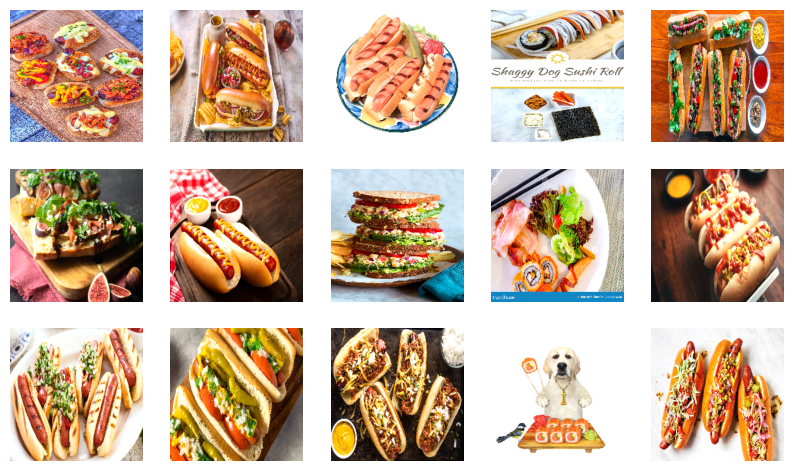

In [9]:
plt.figure(figsize=(10, 10))
for n in range(15):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(image[n])
    plt.axis('off')

## 2 模型构建与训练

In [17]:
ResNet50 = tf.keras.applications.ResNet50(weights = 'imagenet', input_shape = (224,224,3))

for layer in ResNet50.layers:
    layer.trainable = False

net = tf.keras.models.Sequential()
net.add(ResNet50)
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(2, activation = 'sigmoid'))

In [18]:
# 模型编译
net.compile(optimizer = 'adam', loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [20]:
# 模型训练
net.fit(train_data_gen, steps_per_epoch = 10, epochs = 3, batch_size = 32, validation_data = test_data_gen, validation_steps = 10)

Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 569ms/step - accuracy: 0.6238 - loss: 0.6926 - val_accuracy: 0.5882 - val_loss: 0.6923
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 476ms/step - accuracy: 0.5640 - loss: 0.6923 - val_accuracy: 0.5882 - val_loss: 0.6919
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 612ms/step - accuracy: 0.5853 - loss: 0.6918 - val_accuracy: 0.5882 - val_loss: 0.6915
